# Yelp  Exploratory data analytics

In [170]:
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 


color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")


%matplotlib inline

In [171]:
path = 'D:/AMOGH'

In [172]:
business=pd.read_csv(path +"/yelp_business.csv")



In [173]:
reviews = pd.read_csv(path+"/yelp_review.csv",nrows=100000)


In [174]:
check_in = pd.read_csv(path + "/yelp_checkin.csv")


In [176]:
business.to_csv('business')

In [177]:
business.shape

(174567, 13)

In [178]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [179]:
business_describe = business.describe()

In [180]:
business_describe.to_csv('business_describe')

In [181]:
business_describe

,latitude,longitude,stars,review_count,is_open
count,174566.000000,174566.000000,174567.000000,174567.000000,174567.000000
mean,38.627312,-92.679009,3.632196,30.137059,0.840376
std,5.389012,26.240079,1.003739,98.208174,0.366258
min,-36.086009,-142.466650,1.000000,3.000000,0.000000
25%,33.631550,-112.125879,3.000000,4.000000,1.000000
50%,36.144257,-89.410128,3.500000,8.000000,1.000000
75%,43.606181,-79.657609,4.500000,23.000000,1.000000
max,89.999314,115.086769,5.000000,7361.000000,1.000000


## rating_distribution

In [182]:
x = business['stars'].value_counts()

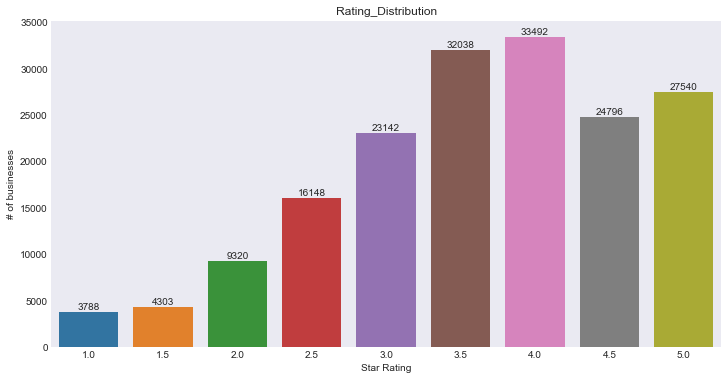

In [183]:
x = business['stars'].value_counts()
x = x.sort_index()
plt.figure(figsize=(12,6))
ax= sns.barplot(x.index,x.values)
plt.title("Rating_Distribution")
plt.ylabel("# of businesses",fontsize = 10)
plt.xlabel("Star Rating",fontsize = 10)

# adding text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.savefig("D:/AMOGH/r plots/Rating_distribution.png")

In [184]:
# what are the pop business categories

In [185]:
business_cats= ' '.join(business['categories'])

In [186]:
cats = pd.DataFrame(business_cats.split(';'),columns=['categories'])


In [187]:
x=cats.categories.value_counts()

In [188]:
len(x)

59106

In [189]:
x = x.sort_values(ascending=False)

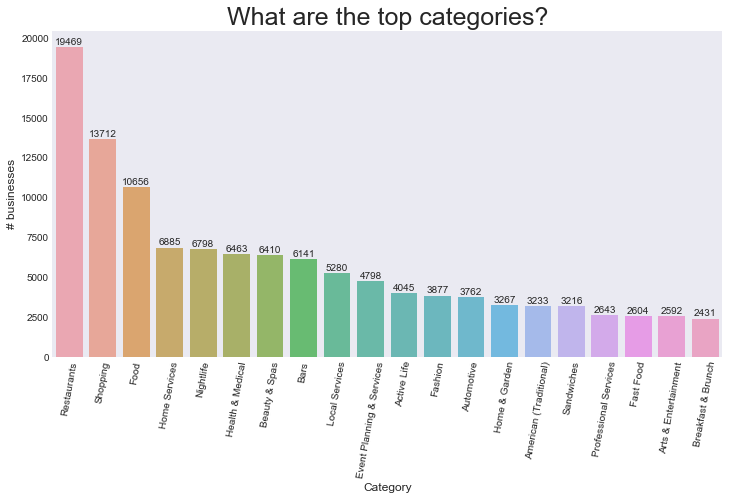

In [190]:
x = x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(12,6))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)


#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

            
plt.savefig("D:/AMOGH/r plots/Top categories.png")

In [191]:
# which city has the most reviews

In [192]:
x = business['city'].value_counts()

In [193]:
locs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [194]:
labels

array([19469, 13712, 10656,  6885,  6798,  6463,  6410,  6141,  5280,
        4798,  4045,  3877,  3762,  3267,  3233,  3216,  2643,  2604,
        2592,  2431], dtype=int64)

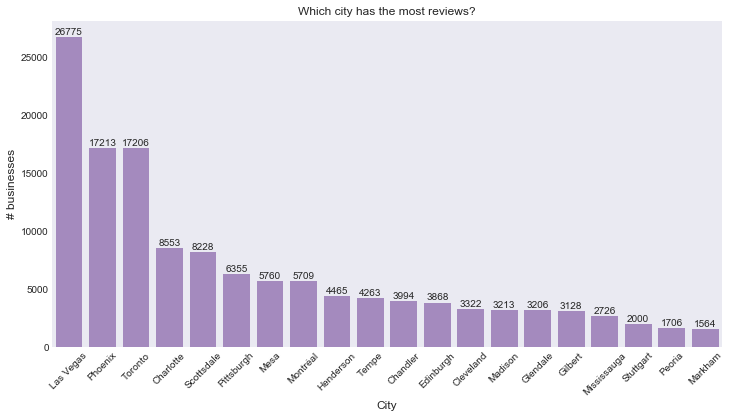

In [195]:
#Get the distribution of the ratings
x=business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(12,6))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[4])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')



plt.savefig("city_review.png")
plt.savefig("D:/AMOGH/r plots/most_reviews_city.png")

In [196]:
# rating in vagas and toronto

In [197]:
# get all the ratings
rating_data = business[['latitude','longitude','stars','review_count']]

In [198]:
rating_data['popularity'] = rating_data['stars']*rating_data['review_count']

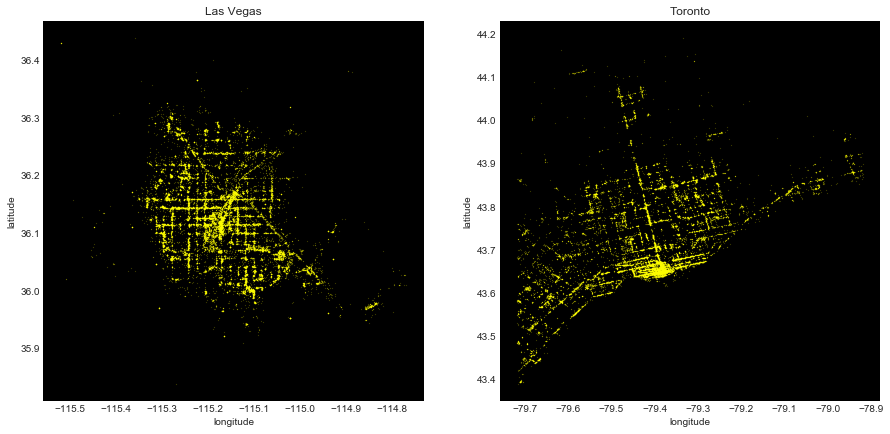

In [199]:
rating_data = business[['latitude','longitude','stars','review_count']]
rating_data['popularity'] = rating_data['stars']*rating_data['review_count']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

#a random point inside vegas
lat = 36.207430
lon = -115.268460
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas
ratings_data_vegas=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")
ax1.set_facecolor('black')

#a random point inside pheonix
lat = 43.726462
lon = -79.417695
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for pheonix
ratings_data_pheonix=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_pheonix.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Toronto")
ax2.set_facecolor('black')
f.show()


plt.savefig("D:/AMOGH/r plots/map.png")

In [200]:
# reviews deep dive 

In [201]:
user_agg = reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],'useful':['sum'],'funny':['sum'],'cool':['sum'],
                                  'stars':['mean']})

In [202]:
user_agg = user_agg.sort_values([('review_id','count')],ascending=False)

In [203]:
print("Top 10 user")
user_agg.head(10)

Top 10 user


funny review_id     stars        date              \
                         sum     count      mean         min         max   
user_id                                                                    
YwaKGmRNnSa3R3N4Hf9jLw   982       518  3.830116  2008-10-15  2017-12-06   
YIMeEHUYm69m-Mqf-NjPHw   232       378  3.917989  2009-04-27  2017-12-07   
1ghFOCMBpo2bGaWu_c1tcg    64       316  3.914557  2010-04-30  2017-12-01   
oAil_gYOXUhqWnKA8SwKsw   441       305  3.813115  2013-11-06  2017-11-29   
_5keMAmic7zzrnM5mVefBw    52       295  3.555932  2013-10-13  2017-12-06   
zwhty_ZmxbHAHoDfMjNbag   133       292  3.972603  2011-02-06  2017-10-08   
JXHrhT72U6sZJQSkFfNzjw   115       290  3.658621  2011-10-31  2017-11-25   
PVyZXgOkVtnU6966FDFhuw   146       275  3.760000  2013-02-09  2017-11-03   
5V8eXkTJb6IejJkMDaj_Bw   272       264  3.693182  2009-07-09  2013-06-17   
9uE0smG2bwgkI95RPj0lPQ   316       259  4.204633  2008-04-02  2017-04-20   

                       useful  cool  
                          sum   sum  
user_id                              
YwaKGmRNnSa3R3N4Hf9jLw   2040  1508  
YIMeEHUYm69m-Mqf-NjPHw    636   315  
1ghFOCMBpo2bGaWu_c1tcg    317    98  
oAil_gYOXUhqWnKA8SwKsw   1013   467  
_5keMAmic7zzrnM5mVefBw    250    77  
zwhty_ZmxbHAHoDfMjNbag    542   289  
JXHrhT72U6sZJQSkFfNzjw    561   256  
PVyZXgOkVtnU6966FDFhuw    506   181  
5V8eXkTJb6IejJkMDaj_Bw    649   357  
9uE0smG2bwgkI95RPj0lPQ    828   392

In [204]:
# user review stats

In [205]:
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30

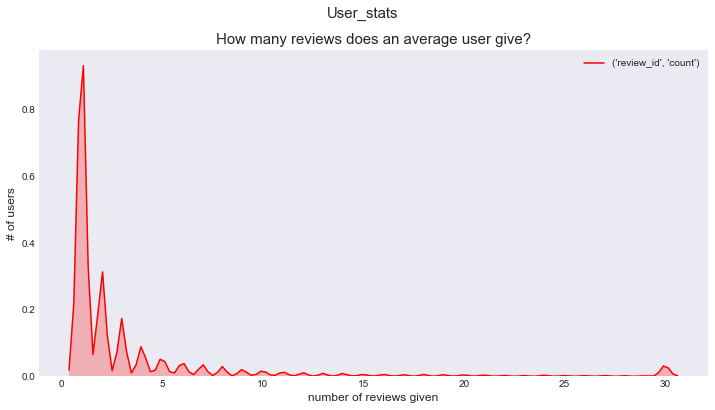

In [206]:
user_agg = reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],'useful':['sum'],'funny':['sum'],'cool':['sum'],
                                  'stars':['mean']})
user_agg = user_agg.sort_values([('review_id','count')],ascending=False)
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,6))
plt.suptitle('User_stats',fontsize = 15)
#gridspec.GridSpec(1,2)
#plt.subplot2grid((1,2),(0,0))

#cumulative distribution

ax = sns.kdeplot(user_agg[('review_id','count')],shade = True,color = 'r')
plt.title('How many reviews does an average user give?',fontsize = 15)
plt.xlabel('number of reviews given',fontsize = 12)
plt.ylabel('# of users',fontsize = 12)

plt.savefig("D:/AMOGH/r plots/reviews_avg.png")

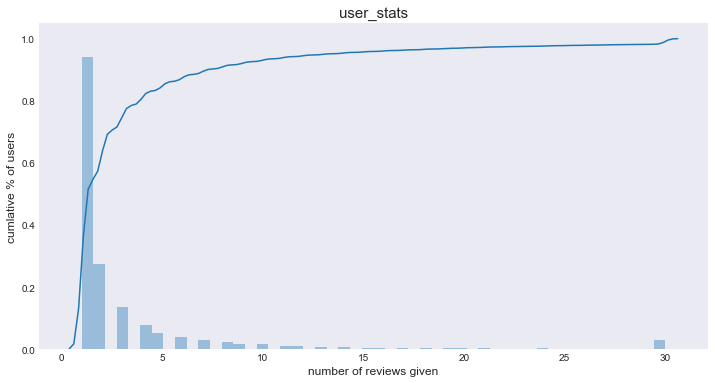

In [207]:
plt.figure(figsize=(12,6))
ax = sns.distplot(user_agg[('review_id','count')],kde_kws=dict(cumulative=True))
plt.title('user_stats',fontsize = 15)
plt.xlabel('number of reviews given',fontsize = 12)
plt.ylabel('cumlative % of users',fontsize = 12)

plt.savefig("D:/AMOGH/r plots/user_stats.png")

In [208]:
# check in
check_in.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [209]:
df = check_in.groupby(['weekday','hour'])['checkins'].sum()

In [210]:
df =df.reset_index()


In [211]:
df=df.pivot(index='hour',columns='weekday')[['checkins']]

In [212]:
df.columns = df.columns.droplevel()

In [213]:
df.columns

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object', name='weekday')

In [214]:
df = df.reset_index()

In [215]:
df.hour = df['hour'].apply(lambda x : x.split(':')[0])

In [216]:
df = df.sort_values('hour')

In [217]:
df=df[['hour','Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun' ]]

In [218]:
cm = sns.light_palette("red", as_cmap=True)

In [219]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [220]:
#df = df.style.apply(highlight_max, color='darkorange', axis=0)


In [221]:
df

weekday,hour,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,163336,156195,166254,171669,178666,224425,225209
11,1,161168,162632,174696,181712,190371,245453,235295
1,10,10432,9448,9200,9776,11837,16753,15903
2,11,14580,14397,14568,14791,15617,15833,13724
3,12,23655,24994,24828,24631,26149,21330,16856
4,13,33640,35002,34519,34514,37355,36613,28085
5,14,48243,50415,51139,51012,56684,63294,49652
6,15,66663,67864,69115,70076,79148,103651,86110
7,16,88219,86936,89414,91269,106798,149504,129330
8,17,100422,95791,97497,99254,119295,188682,171205


In [222]:
# most reviews

In [223]:
reviews_group = reviews[reviews['stars'] == 5]


In [224]:
re = reviews_group.groupby(['business_id'])['stars'].count()

In [225]:
re = re.reset_index()

In [226]:
re = re.sort_values('stars',ascending=False)

In [227]:
names = pd.merge(re,business,on ='business_id')

In [228]:
names = names.sort_values('review_count',ascending=False)

In [229]:
names = names.iloc[0:30,:]

In [230]:
names.head()

,business_id,stars_x,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories
2,4JNXUYY8wbaaDmk3BPzlWw,48,"""Mon Ami Gabi""",The Strip,"""3655 Las Vegas Blvd S""",Las Vegas,NV,89109,36.112827,-115.172581,4.0,7361,1,French;Steakhouses;Restaurants;Breakfast & Brunch
8,RESDUcs7fIiihp38-d6_6g,32,"""Bacchanal Buffet""",The Strip,"""3570 S Las Vegas Blvd""",Las Vegas,NV,89109,36.116113,-115.176222,4.0,7009,1,Sandwiches;Buffets;Restaurants;Breakfast & Bru...
5,K7lWdNUhCbcnEvI0NhGewg,38,"""Wicked Spoon""",The Strip,"""3708 Las Vegas Blvd S""",Las Vegas,NV,89109,36.109538,-115.176170,3.5,5950,1,Buffets;Breakfast & Brunch;Restaurants
1,cYwJA2A6I12KNkm2rtXd5g,49,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants
0,DkYS3arLOhA8si5uUEmHOw,50,"""Earl of Sandwich""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.108228,-115.171869,4.5,4869,1,Caterers;Sandwiches;Restaurants;Food Delivery ...


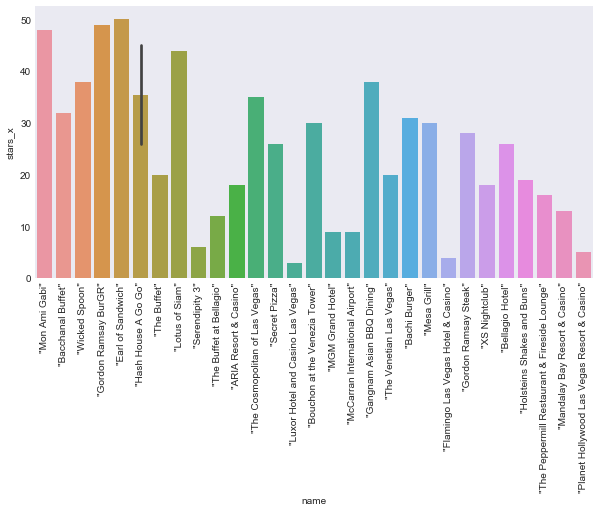

In [231]:
plt.figure(figsize=(10,5))
sns.barplot('name','stars_x',data=names)
plt.xticks(rotation = 90)
plt.savefig("D:/AMOGH/r plots/review_count.png")

In [232]:
review_lotus_of_siam = reviews[reviews['business_id'] == 'cYwJA2A6I12KNkm2rtXd5g']

In [233]:
review_lotus_of_siam.shape

(109, 9)

In [234]:
review_lotus_of_siam['text'] = [i.lower() for i in review_lotus_of_siam['text']]

In [235]:
review_lotus_of_siam['stars'] = review_lotus_of_siam['stars'].replace(2,1)
review_lotus_of_siam['stars'] = review_lotus_of_siam['stars'].replace(5,4)

In [236]:
negative = review_lotus_of_siam[review_lotus_of_siam['stars'] == 1]

In [237]:
negative_words = ' '.join(negative['text'])

In [238]:
word = ' '.join(review_lotus_of_siam['text'])

In [239]:
words =" ".join([word for word in word.split()])

In [240]:
from wordcloud import WordCloud

In [241]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [242]:
Stopwords = set(stopwords.words('english'))

In [243]:
#x = []
#for i in d['index']:
 #   x.append('{}'.format(i))

In [244]:
positive = review_lotus_of_siam[review_lotus_of_siam['stars'] == 4]

In [245]:
postive_words = ' '.join(positive['text'])

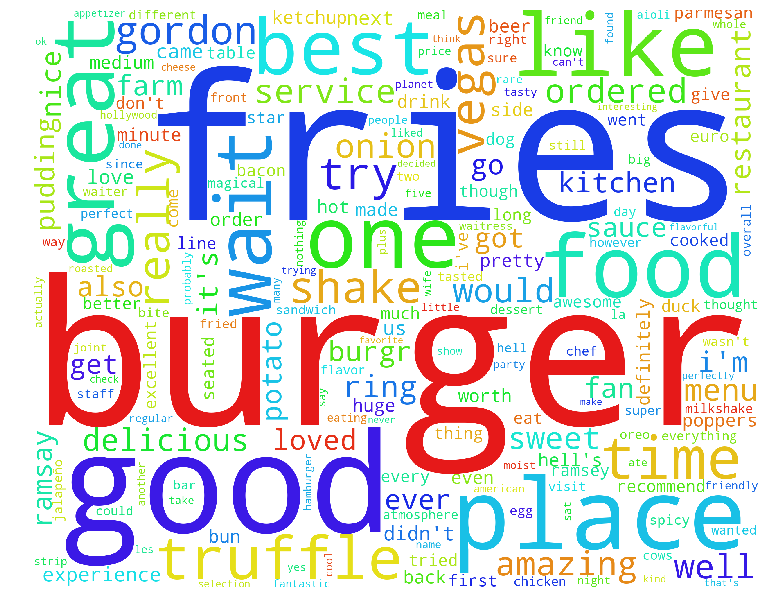

In [246]:
wordcloud = WordCloud(stopwords=Stopwords,
                      background_color='white',
                      width=2500,
                      height=2000
                     ).generate(postive_words)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("D:/AMOGH/r plots/positive.png")

In [247]:
import nltk

In [248]:
text = nltk.Text(negative['text'])

In [249]:
grams = ngrams(text,n=2)

In [250]:
def ngrams(words, n=2):
    for idx in range(len(words)-n+1):
        yield tuple(words[idx:idx+n])

In [251]:
import nltk
import re

In [252]:
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer


In [253]:
lemmentizer = WordNetLemmatizer()

In [254]:
def train(name):
    
    text_name = nltk.Text(name)
    text_names = []
    for text in text_name:
        text_ = []
        text = text.lower()
        T = re.sub('\n','',text)
        text_.append(T)
        for i in text_:
            d = re.findall(r'[a-z0-9]+',i)
            text_names.append(' '.join(d))
            
            
            
            
    word_tokenize = []
    full_word_sent =[]
    from nltk import wordpunct_tokenize
    for sentence in text_names:
        words =[]
        for word in wordpunct_tokenize(sentence):
            word_tokenize.append(word)
            words.append(word)
        full_word_sent.append(words)
            
            
    
    words_token =[]
    words = []
    for sent in full_word_sent:
        word_token =[]
        for word in sent:
            if word not in Stopwords:
                word_token.append(word)
        words_token.append(word_token)
        
        
            
            
    words =[]
    for i in words_token:
        for x in i:
            words.append(x)
    

    
    tags =[]
    for pos in words_token:
        tp =[]
        for word in pos:
            tp.append(lemmentizer.lemmatize(word))
        tags.append(tp)
       
    
    from nltk import pos_tag
    pos_tags_all=[]
    for x in tags:
        pos_tags_all.append(pos_tag(x))
        
        
    return tags,words,pos_tags_all,words_token

In [255]:
tags_name,words_name,pos_tags_name,words_tokens = train(review_lotus_of_siam['text'])

In [256]:
tags_name_negative,words_name,pos_tags_name,words_tokens = train(negative['text'])

In [257]:
def ngrams(words, n=2):
    for idx in range(len(words)-n+1):
        return tuple(words[idx:idx+n])

In [258]:
negative['tag_name'] = tags_name_negative
negative['tag_name'] = negative['tag_name'].apply(' '.join)

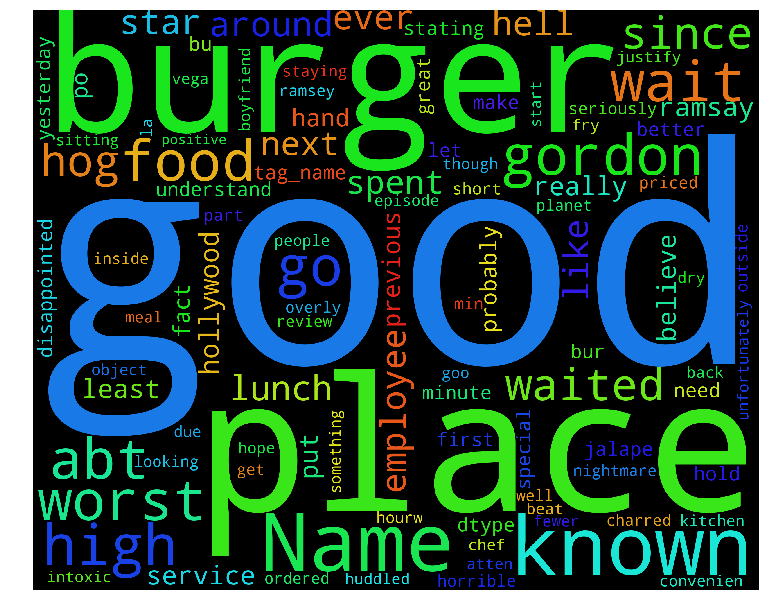

In [259]:
wordcloud = WordCloud(stopwords=Stopwords,
                      background_color='black',
                      width=2500,
                      height=2000).generate(str(negative['tag_name']))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("D:/AMOGH/r plots/negative.png")

In [260]:
import gensim.corpora;
from gensim.models import ldamodel

In [261]:
num_topic = 1

In [262]:
id2words = gensim.corpora.Dictionary(tags_name)
corpus = [id2words.doc2bow(text) for text in tags_name]
lda = ldamodel.LdaModel(corpus=corpus,id2word=id2words,num_topics=num_topic)
def lda_x(model,n_topics):
    word_dict ={}
    word_dict1 ={}
    for i in range(n_topics):
        word = model.show_topic(i,topn=20)
        word_dict['topic '+'{}'.format(i+1)]= [i[0] for i in word]
        word_dict1['topic '+'{}'.format(i+1)]= [i[1] for i in word]
    return pd.DataFrame(word_dict),pd.DataFrame(word_dict1)
   

In [263]:
word,wo_pro = lda_x(lda,1)

In [264]:
wo_pro.rename(columns={'topic 1':'prob'},inplace=True)

In [265]:
df = pd.DataFrame({'key' : word['topic 1'],'value': wo_pro['prob']})

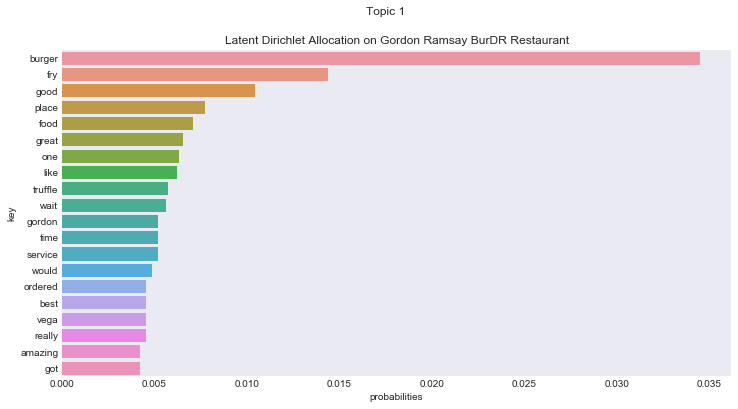

In [266]:
plt.figure(figsize=(12,6))
sns.barplot('value','key',data=df)
plt.title('Latent Dirichlet Allocation on Gordon Ramsay BurDR Restaurant')
plt.suptitle('Topic 1')
plt.xlabel('probabilities')

plt.savefig("D:/AMOGH/r plots/lda.png")